  # Python for Data Science Bootcamp
  ## Review Data Munging and Matplotlib

Import the yelp_reviews_sample.csv file as a Dataframe

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [102]:
data=pd.read_csv('yelp_reviews_sample.csv', encoding='latin_1')

In [9]:
data

,business_name,review_id,user_id,stars,review_date,review_text,funny,useful,cool
0,Thai Pan Fresh Exotic Cuisine,0ESSqLfOae77muWTv_zUqA,r-t7IiTSD0QZdt8lOUCqeQ,3,2011-02-11,Lately i have been feeling homesick for asian ...,1,1,1
1,Salon Lola,VyAKIaj_Rmsf_ZCHcGJyUw,SS85hfTApRnbTPcJadra8A,5,2010-05-30,I love Marilo! She understands my hair type a...,0,0,0
2,Chipotle Mexican Grill,DusrkpkTGPGkqK13xO1TZg,xAVu2pZ6nIvkdHh8vGs84Q,3,2011-11-26,Standard Chipotle fare - consistently good; no...,0,0,0
3,Sam's Deli,A5FL-YYXnr2hnvXQbgkkrQ,Xuvj2Fq6c3mCmplVG7h21w,4,2013-10-10,Very good prices with quality ingredients.,0,0,0
4,Petco,SzhIWfzLHUZfiAaVTtKHxw,jHH_UDpCnF-YTnveyoMTIA,1,2012-09-02,I went to this Petco a few times and was a bit...,0,1,0
5,The Gilbert House,EaBnd0MGL61KhvFwS3bQvQ,b5TgTsk4dv8x2KDZYI-V7w,4,2011-05-16,This is the first unique (not chain) brunch pl...,0,0,0
6,Tilted Kilt Pub & Eatery,Rp1yvabsZ76dNwjG1MMTkA,P1qwZrslRv9KS9vPJNXe4g,2,2009-04-16,"Brian S. Sum's it up perfectly with ""if you're...",1,5,3
7,Pugzie's,rrIMJijS60XTgjRTGBCLcw,vsXP832M0kOxKpfduD7dWw,?,2008-08-25,Remember the no-bake cookies of your elementar...,1,1,1
8,Jade Bar,6z6wOKSFVcZfCdhOPcZY5g,cgD3mG3fZkIccOk1R9O2UQ,5,2012-01-02,I love coming to this bar. Friendly bartenders...,0,0,0
9,Hana Japanese Eatery,zSZ47fXX02XGxTJSQ-vulg,Iqjw_gWq6okooSkmZ9a_1A,5,2012-04-10,Great sushi rolls and BYOB! Very friendly sta...,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16390 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16390 non-null object
review_id        16390 non-null object
user_id          16390 non-null object
stars            16390 non-null object
review_date      16390 non-null object
review_text      16390 non-null object
funny            16390 non-null int64
useful           16390 non-null int64
cool             16390 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [10]:
data.describe()

,funny,useful,cool
count,16390.000000,16390.00000,16390.000000
mean,0.607200,1.25119,0.764185
std,1.773961,2.08471,1.784975
min,0.000000,0.00000,0.000000
25%,0.000000,0.00000,0.000000
50%,0.000000,1.00000,0.000000
75%,1.000000,2.00000,1.000000
max,70.000000,38.00000,36.000000


Investigate the data and see if anything needs cleaning.  Hint: Check the unique values and value_counts for stars column.

In [11]:
data.stars.unique()

array([u'3', u'5', u'4', u'1', u'2', u'?'], dtype=object)

# value_counts() :: very useful function but only applicable for one column at one time

In [129]:
data.stars.value_counts()

5    5842
4    5371
3    2334
2    1481
1    1348
Name: stars, dtype: int64

Clean the data by removing the reviews with '?' for stars rating

In [103]:
data = data.dropna(subset=['stars'])

In [104]:
data[data['stars']=='?'].count()

business_name    14
review_id        14
user_id          14
stars            14
review_date      14
review_text      14
funny            14
useful           14
cool             14
dtype: int64

In [105]:
data[data['stars']!='?'].count()

business_name    16376
review_id        16376
user_id          16376
stars            16376
review_date      16376
review_text      16376
funny            16376
useful           16376
cool             16376
dtype: int64

In [106]:
data = data[data['stars']!='?']

In [107]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16376 non-null object
review_id        16376 non-null object
user_id          16376 non-null object
stars            16376 non-null object
review_date      16376 non-null object
review_text      16376 non-null object
funny            16376 non-null int64
useful           16376 non-null int64
cool             16376 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [108]:
data.stars.unique()

array([u'3', u'5', u'4', u'1', u'2'], dtype=object)

In [110]:
data_z = data.groupby('stars')['business_name'].count().reset_index()
data_z.rename(columns={'business_name':'review_count'},inplace=True)
data_z

,stars,review_count
0,1,1348
1,2,1481
2,3,2334
3,4,5371
4,5,5842


Replace the stars values that are text with integers

In [114]:
data.stars.replace(['1','2','3','4','5'],[1,2,3,4,5],inplace=True)

In [116]:
#Approach 2

data_stars = data.stars.apply(int)
data_stars.info()

AttributeError: 'Series' object has no attribute 'info'

In [ ]:
#Approach 3

#    data_stars = data.to_numeric(data.stars)

In [ ]:
#Approach 4

#    data_strs = data.stars.astype(int)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16376 non-null object
review_id        16376 non-null object
user_id          16376 non-null object
stars            16376 non-null int64
review_date      16376 non-null object
review_text      16376 non-null object
funny            16376 non-null int64
useful           16376 non-null int64
cool             16376 non-null int64
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [131]:
print data.describe()

              stars         funny        useful          cool
count  16376.000000  16376.000000  16376.000000  16376.000000
mean       3.786395      0.607169      1.250916      0.764045
std        1.247527      1.774147      2.084798      1.784997
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     70.000000     38.000000     36.000000


In [130]:
print data.describe().T

          count      mean       std  min  25%  50%  75%   max
stars   16376.0  3.786395  1.247527  1.0  3.0  4.0  5.0   5.0
funny   16376.0  0.607169  1.774147  0.0  0.0  0.0  1.0  70.0
useful  16376.0  1.250916  2.084798  0.0  0.0  1.0  2.0  38.0
cool    16376.0  0.764045  1.784997  0.0  0.0  0.0  1.0  36.0


How many 5 star reviews does Lo-Lo's Chicken & Waffles have?

In [117]:
data [ (data['stars']==5) & (data['business_name']=="Lo-Lo's Chicken & Waffles")]['business_name'].count()

20

In [135]:
# Approach 2 -----------------
print data.stars[
    data['business_name']=="Lo-Lo's Chicken & Waffles"
    ].value_counts().reset_index()


   index  stars
0      5     20
1      4     12
2      3      5
3      2      2
4      1      2


In [118]:
data[data['stars']==5 ]['business_name'].count()

5842

In [119]:
data[data['business_name']=="Lo-Lo's Chicken & Waffles"]['business_name'].count()

41

In [120]:
data_ = data[data['business_name']=="Lo-Lo's Chicken & Waffles"]
data_[data_['stars']==5 ]['business_name'].count()

20

What's the most number of cool votes a review received?

In [136]:
print data.cool.max()

36


In [121]:
data_y = data.groupby('cool')[['user_id']].count().reset_index()
data_y.rename(columns={'user_id':'cool_count'},inplace=True)
data_y = data_y.sort_values('cool_count', axis=0, ascending=False)
data_y.iloc[0]


cool              0
cool_count    10727
Name: 0, dtype: int64

Which business has the most reviews? (hint: use .value_counts())

In [137]:
data.business_name.value_counts()

Pita Jungle                                     94
Oregano's Pizza Bistro                          72
Pizzeria Bianco                                 69
Cornish Pasty Company                           58
Phoenix Sky Harbor International Airport        57
FEZ                                             52
Five Guys Burgers and Fries                     49
Matt's Big Breakfast                            48
Four Peaks Brewing Co                           44
True Food Kitchen                               43
Postino Arcadia                                 42
Lo-Lo's Chicken & Waffles                       41
Smashburger                                     40
Hula's Modern Tiki                              39
Lux                                             39
Chompie's Deli                                  38
Chelsea's Kitchen                               38
Starbucks                                       37
The Parlor                                      35
Cibo                           

In [141]:
data.groupby[['business_name','review_text']][data.cool == data.cool.max()]

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [122]:
data_x = data.groupby('business_name')[['user_id']].count().reset_index()
data_x.rename(columns={'user_id':'review_count'},inplace=True)
data_x = data_x.sort_values('review_count', axis=0, ascending=False)
data_x.iloc[0]
#print data_x.sort_values()
#print data_x

business_name    Pita Jungle
review_count              94
Name: 3025, dtype: object

Create a scatter plot of the average star rating vs. average cool review per business (Hint: Use groupby to get the data)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sb

In [124]:
%matplotlib inline

In [125]:
data_stars = data.groupby('business_name')['stars'].mean().reset_index()
data_stars.head()

,business_name,stars
0,#1Brothers Pizza,1.000000
1,101 Bistro,3.000000
2,1130 The Restaurant,2.857143
3,16th Hole at The Phoenix Open,5.000000
4,16th Street Sports Bar & Grill,4.000000


In [126]:
data_cool =  data.groupby('business_name')['cool'].mean().reset_index()
data_cool.head()

,business_name,cool
0,#1Brothers Pizza,1.000000
1,101 Bistro,2.000000
2,1130 The Restaurant,0.142857
3,16th Hole at The Phoenix Open,0.000000
4,16th Street Sports Bar & Grill,1.000000


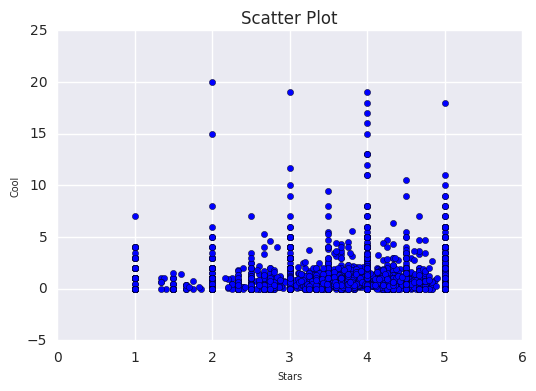

In [127]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(data_stars.stars, data_cool.cool)
plt.xlabel('Stars', fontsize=7)
plt.ylabel('Cool',  fontsize=7)
plt.title(r'Scatter Plot')

Bonus:  Change the marker size and transparency in the plot

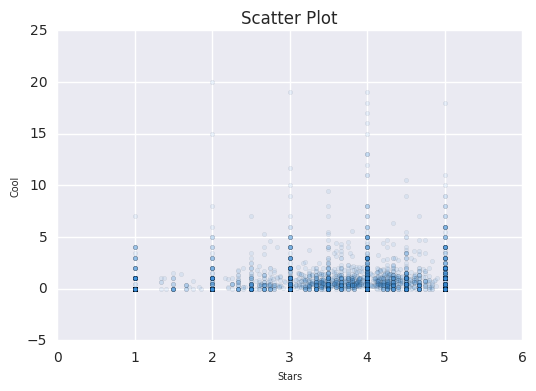

In [128]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(data_stars.stars, data_cool.cool,            
            s=10, #size
           c='#4093DD', #color
           alpha=.1, #transparency
           marker='o')
plt.xlabel('Stars', fontsize=7)
plt.ylabel('Cool',  fontsize=7)
plt.title(r'Scatter Plot')